### Steps 
* Step 1: Load Dataset
* Step 2: Make Dataset iterable
* Step 3: Create Model Class
* Step 4: Instantiate Model Class
* Step 5: Instantiate Loss Class
* Step 6: Instantiate Optimizer Class
* Step 7: Train Model

### Step 1: Load Dataset

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [3]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:47<00:00, 211kB/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 71.1kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:07<00:00, 213kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.97MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [4]:
len(train_dataset)

60000

In [5]:
print(train_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [7]:
type(train_dataset[0])

tuple

In [9]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [13]:
train_dataset[3][1]

1

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

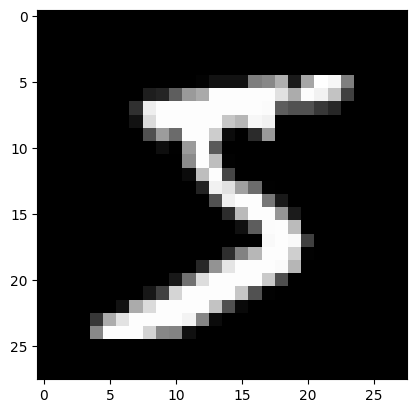

In [16]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

### Step 1b: Loading MNIST test dataset

In [17]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [18]:
len(test_dataset)

10000

### Step 2: Make Dataset Iterable

In [19]:
batch_size = 100
n_iters = 3000

In [20]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [21]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [23]:
import collections

isinstance(train_loader,collections.abc.Iterable)

True

In [24]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### Step 3: Build Model Class 

In [25]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        out = self.linear(x)
        return out

### Instantiate Model Class
* Input Dimensions:
    * Size of image
    * 28 x 28 = 784
* Output Dimensions:
    * 10 -> 0,1,2,3,4,5,6,7,8,9

In [26]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [27]:
input_dim = 28*28
output_dim = 10

In [34]:
model = LogisticRegressionModel(input_dim=input_dim,output_dim=output_dim)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cpu')

In [29]:
loss_fn = nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [30]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #Load images as variable
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = loss_fn(outputs,labels)
        loss.backward()
        
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images,labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_().to(device)
                outputs = model(images).to(device)
                _,predicted = torch.max(outputs.data,1)
                
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
                
            
        

Iteration: 500. Loss: 1.8382481336593628. Accuracy: 69.16999816894531
Iteration: 1000. Loss: 1.560909390449524. Accuracy: 76.37000274658203
Iteration: 1500. Loss: 1.2748064994812012. Accuracy: 79.45999908447266
Iteration: 2000. Loss: 1.1668734550476074. Accuracy: 80.9800033569336
Iteration: 2500. Loss: 1.1178035736083984. Accuracy: 82.16999816894531
Iteration: 3000. Loss: 1.0282782316207886. Accuracy: 82.80000305175781


In [31]:
iter_test = 0
for images,labels in test_loader:
    iter_test += 1
    images = images.view(-1,28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-4.6465e-01, -1.2472e+00, -5.1906e-01, -2.8145e-01,  1.3074e-01,
         -4.7741e-01, -1.1698e+00,  2.8295e+00, -4.4121e-01,  8.7901e-01],
        [ 3.3434e-01, -8.7520e-02,  1.5700e+00,  1.0520e+00, -1.7432e+00,
          5.9408e-01,  1.1257e+00, -1.8946e+00,  4.0799e-01, -1.6334e+00],
        [-1.0745e+00,  2.3408e+00,  3.0393e-01,  3.6308e-02, -6.6049e-01,
         -1.7421e-01, -1.4735e-01, -2.0226e-01,  1.4609e-01, -2.2219e-01],
        [ 2.8489e+00, -2.3865e+00, -5.0889e-02, -5.3106e-01, -1.0519e+00,
          4.6235e-01,  1.2275e+00,  2.0567e-01, -6.0333e-01,  4.8121e-02],
        [-1.6134e-01, -2.3968e+00,  5.2106e-01, -6.3447e-01,  1.8154e+00,
         -4.1286e-01,  1.0811e-01,  4.5825e-01, -8.8964e-02,  6.9818e-01],
        [-1.5227e+00,  2.8517e+00,  2.7209e-01,  1.4800e-01, -7.8926e-01,
         -2.8886e-01, -6.7441e-01, -3.2322e-02,  4.1695e-01, -7.3882e-02],
        [-1.0925e+00, -1.3769e+00, -8.0505e-01,  1.4747e-01,  1.3811e+00,
          1.5215e-01, -6

In [32]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.4647, -1.2472, -0.5191, -0.2814,  0.1307, -0.4774, -1.1698,  2.8295,
        -0.4412,  0.8790], grad_fn=<SliceBackward0>)
